In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize, LabelEncoder
from sklearn.cluster import KMeans
import plotly.express as px

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Customers.csv')
print(df)

      CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1    Male   19              15000                      39   
1              2    Male   21              35000                      81   
2              3  Female   20              86000                       6   
3              4  Female   23              59000                      77   
4              5  Female   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996  Female   71             184387                      40   
1996        1997  Female   91              73158                      32   
1997        1998    Male   87              90961                      14   
1998        1999    Male   77             182109                       4   
1999        2000    Male   90             110610                      52   

         Profession  Work Experience  Family Size  
0        Healthcare                

In [3]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [4]:
df=df.dropna()
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [5]:
df.shape

(1965, 8)

In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1965 non-null   int64 
 1   Gender                  1965 non-null   object
 2   Age                     1965 non-null   int64 
 3   Annual Income ($)       1965 non-null   int64 
 4   Spending Score (1-100)  1965 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         1965 non-null   int64 
 7   Family Size             1965 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 138.2+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,1965.0,1000.309924,578.443714,1.0,498.0,1000.0,1502.0,2000.0
Age,1965.0,48.894656,28.414889,0.0,25.0,48.0,73.0,99.0
Annual Income ($),1965.0,110616.009669,45833.860195,0.0,74350.0,109759.0,149095.0,189974.0
Spending Score (1-100),1965.0,51.078880,27.977176,0.0,28.0,50.0,75.0,100.0
Work Experience,1965.0,4.092621,3.926459,0.0,1.0,3.0,7.0,17.0
Family Size,1965.0,3.757252,1.968335,1.0,2.0,4.0,5.0,9.0


In [10]:
df.drop('CustomerID', axis = 1, inplace= True)
df.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6


Text(0.5, 1.0, 'Count of Customers by Gender')

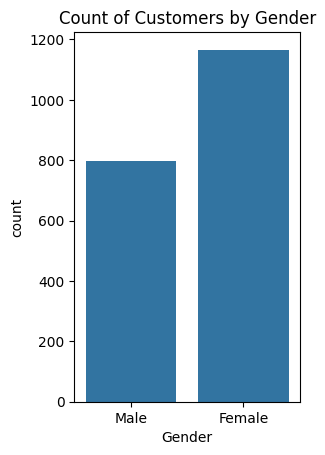

In [11]:
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=df)
plt.title('Count of Customers by Gender')

Text(0.5, 1.0, 'Count of Customers by Profession')

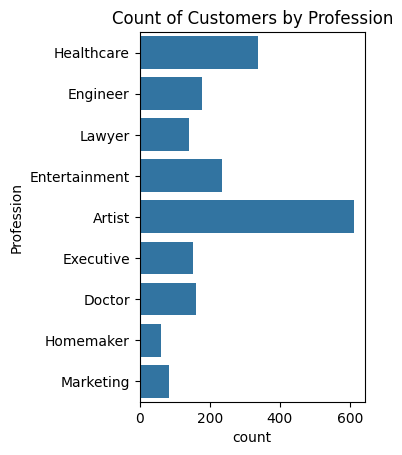

In [12]:
plt.subplot(1, 2, 2)
sns.countplot(y='Profession', data=df)
plt.title('Count of Customers by Profession')

<Axes: xlabel='Profession', ylabel='count'>

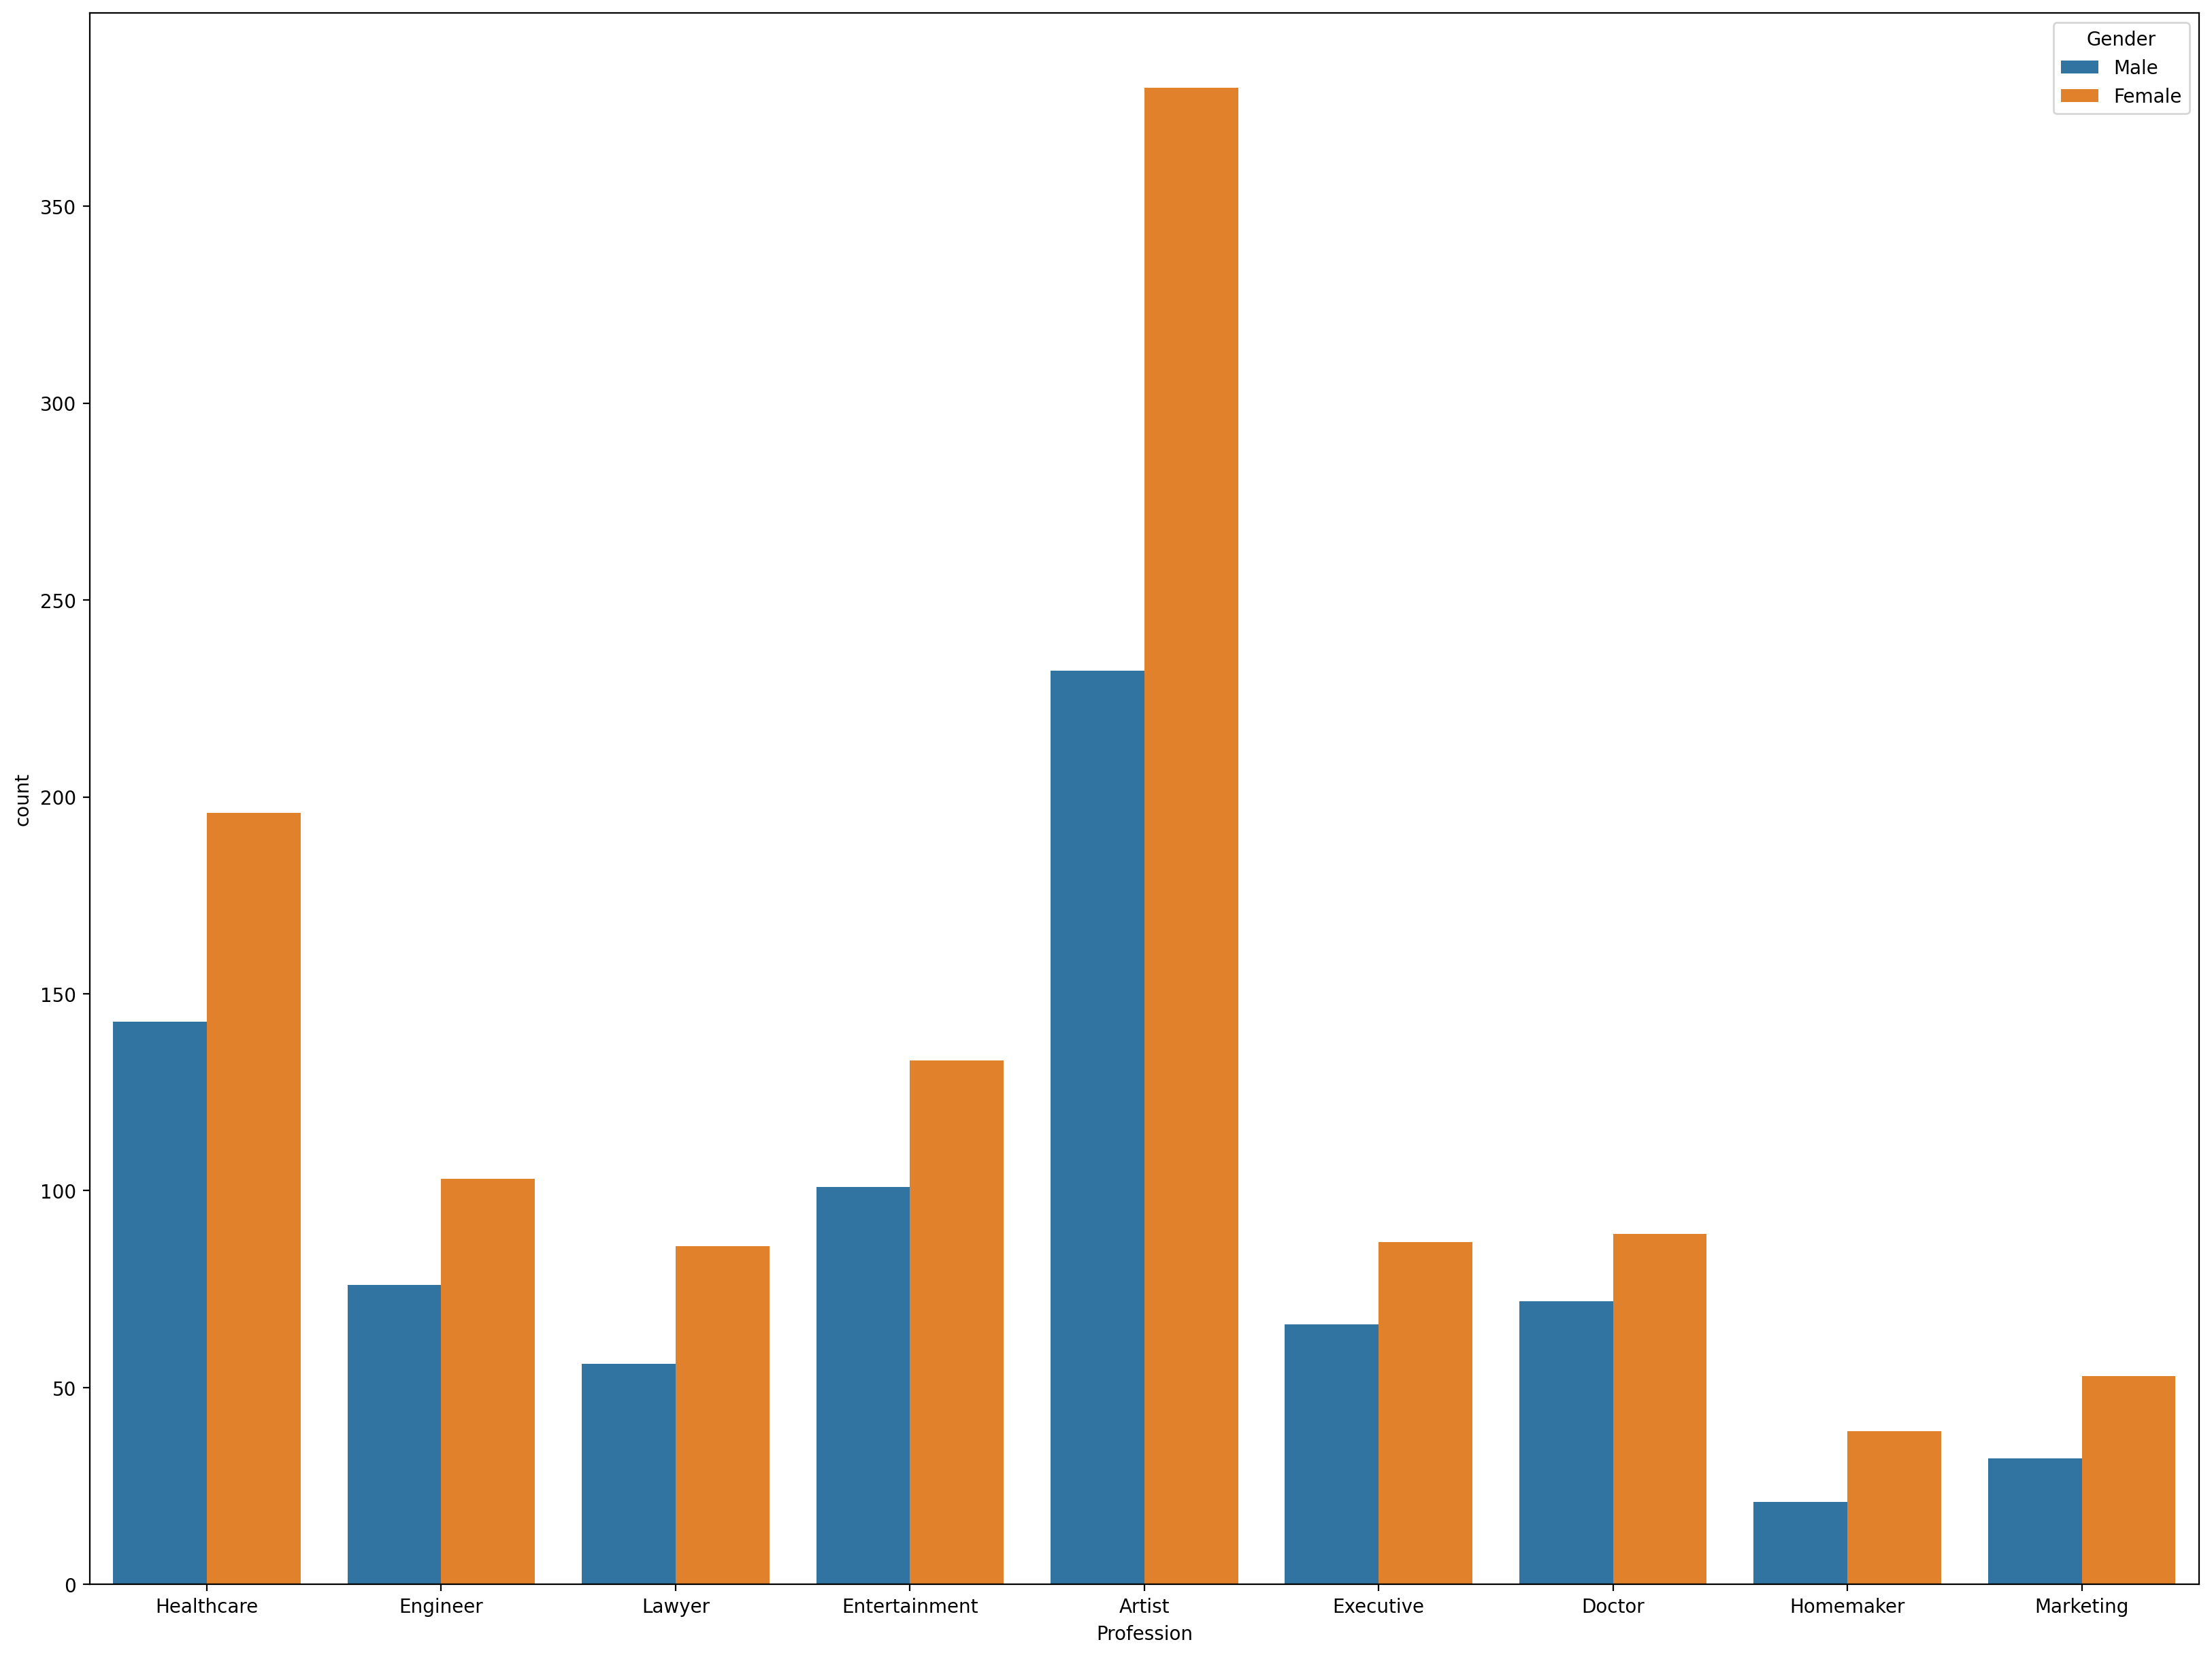

In [13]:
plt.figure(figsize=(20,15),dpi=200)
sns.countplot(data = df,x="Profession",hue="Gender")

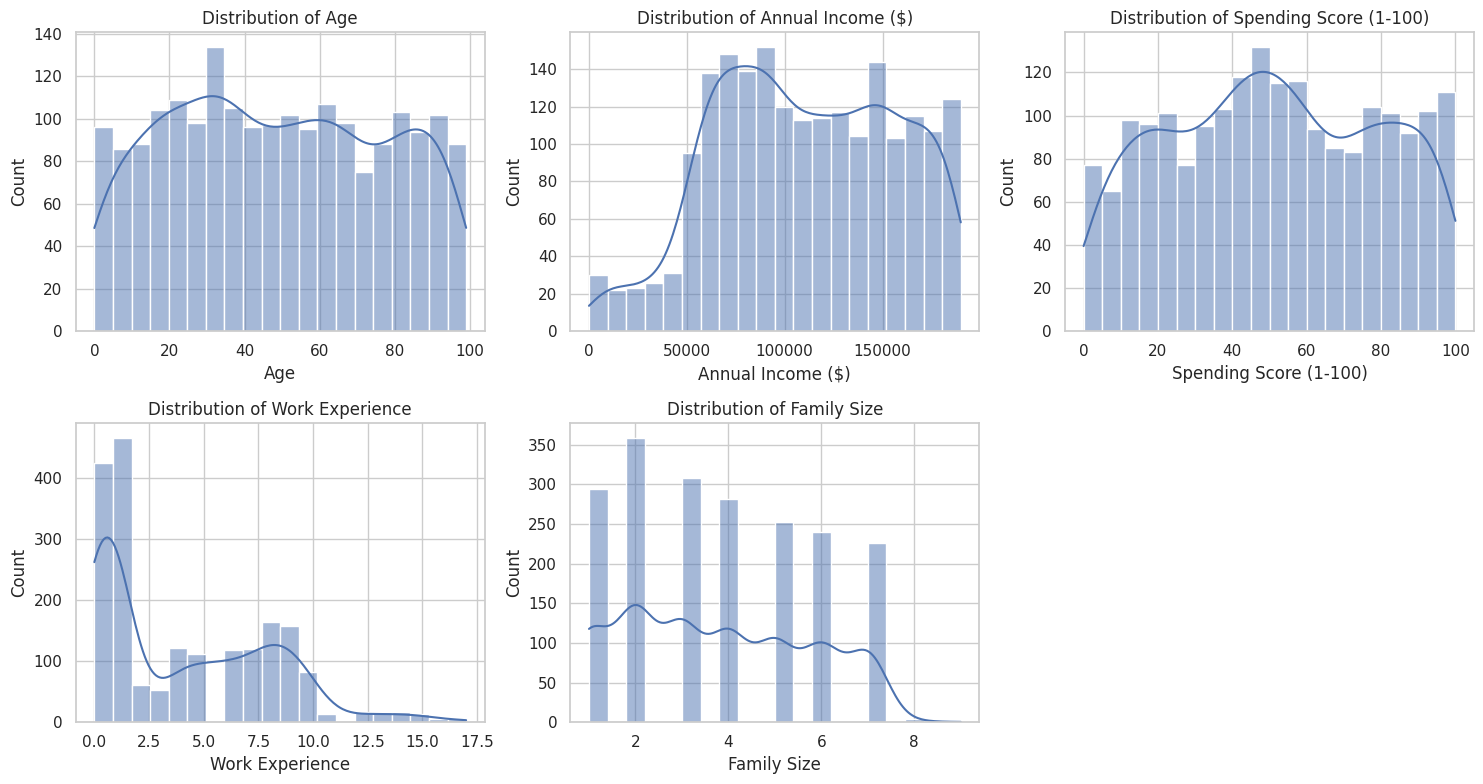

In [14]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Visualizing the distribution of numerical features
plt.figure(figsize=(15, 8))

# Histograms for numerical features
for i, col in enumerate(['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size'], start=1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [15]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Encode 'Profession' using LabelEncoder
# Note: Handle missing values in 'Profession' before encoding, if needed
df['Profession'] = label_encoder.fit_transform(df['Profession'].astype(str))

# Display the first few rows of the encoded DataFrame
print(df.head())

   Gender  Age  Annual Income ($)  Spending Score (1-100)  Profession  \
0       1   19              15000                      39           5   
1       1   21              35000                      81           2   
2       0   20              86000                       6           2   
3       0   23              59000                      77           7   
4       0   31              38000                      40           3   

   Work Experience  Family Size  
0                1            4  
1                3            3  
2                1            1  
3                0            2  
4                2            6  


In [16]:
# Select relevant numerical columns for normalization
numerical_columns = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']

# Create a copy to avoid modifying the original encoded DataFrame
normalized_data = df.copy()

# Display the modified DataFrame
normalized_data.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,19,15000,39,5,1,4
1,1,21,35000,81,2,3,3
2,0,20,86000,6,2,1,1
3,0,23,59000,77,7,0,2
4,0,31,38000,40,3,2,6


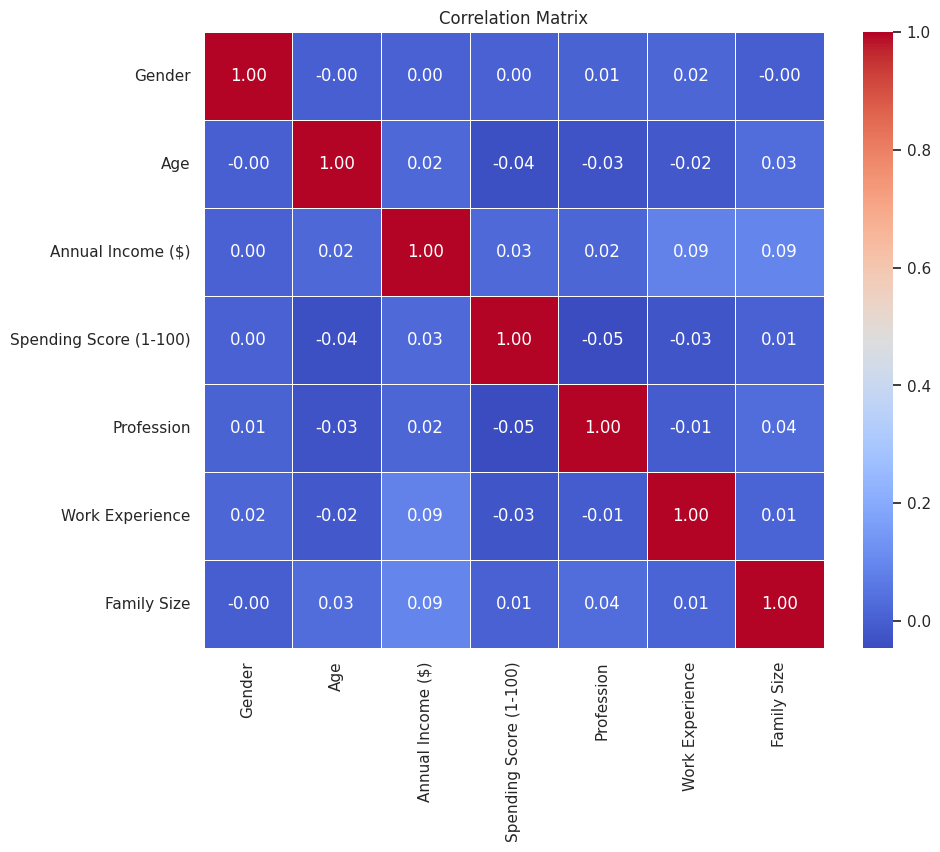

In [17]:
correlation_matrix = normalized_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

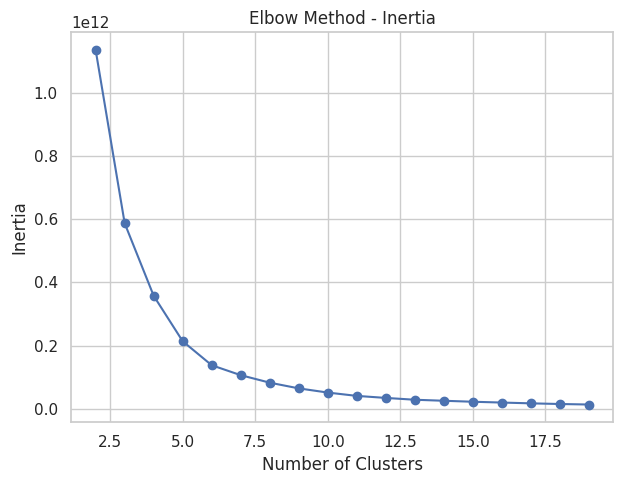

In [18]:
X = normalized_data.values

# Try different numbers of clusters
cluster_range = range(2, 20)
inertia_values = []

for num_clusters in cluster_range:
    # Fit K-Means clustering model
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(X)

    # Calculate inertia (within-cluster sum of squares)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(12, 5))

# Plotting Inertia
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method - Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

In [19]:
# Choose the optimal number of clusters (replace with the identified value)
optimal_num_clusters = 5

# Fit K-Means clustering model with optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_num_clusters, random_state=42, n_init=10)
normalized_data['Cluster'] = kmeans_optimal.fit_predict(X)

# Display the DataFrame with assigned clusters
print(normalized_data.head())

   Gender  Age  Annual Income ($)  Spending Score (1-100)  Profession  \
0       1   19              15000                      39           5   
1       1   21              35000                      81           2   
2       0   20              86000                       6           2   
3       0   23              59000                      77           7   
4       0   31              38000                      40           3   

   Work Experience  Family Size  Cluster  
0                1            4        3  
1                3            3        3  
2                1            1        4  
3                0            2        1  
4                2            6        3  


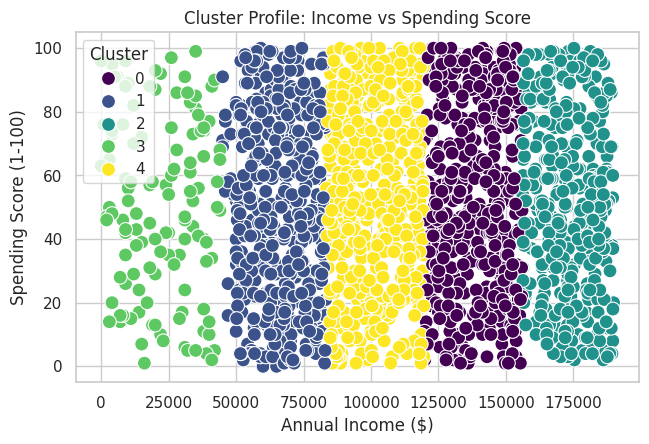

In [20]:
plt.figure(figsize=(16, 10))

# Scatter plot for Income vs Spending Score with clusters differentiated by color
plt.subplot(2, 2, 1)
sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', hue='Cluster', data=normalized_data, palette='viridis', s=100)
plt.title('Cluster Profile: Income vs Spending Score')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')

In [ ]:
fig = px.box(df, x="Gender", y="Annual Income ($)")
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(title={
        'text': "Annual Income vs Gender",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
fig = px.box(df, x="Gender", y="Spending Score (1-100)")
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(title={
        'text': "Spending Score vs Gender",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()